## Realizar el Acceso a Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Instalar e importar librerias necesarias para el desarrollo de la actividad propuesta 

In [ ]:
pip install cytoolz

     |████████████████████████████████| 481kB 4.5MB/s 
  Created wheel for cytoolz: filename=cytoolz-0.10.1-cp36-cp36m-linux_x86_64.whl size=1232796 sha256=ff771810f21d9c21d5db4cd1824f262af142d2bf291eab26318b2062166a634d
  Stored in directory: /root/.cache/pip/wheels/64/2a/18/d962b614e055577e7d9a3e4813e0742f822ca9c8800cc3783a
Successfully built cytoolz


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.sparse as sparse
import matplotlib.pyplot as plt
from cytoolz import groupby

%matplotlib inline
sns.set(style="whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importar el archivo *.csv con los datos de entretenamiento.

In [ ]:
url = '/content/drive/My Drive/Tarea_SR/data/train.csv'
df1 = pd.read_csv(url  ,
                         sep=',',
                        index_col=None,
                         names=['user_id', 'item_id', 'timestamp'],
                         header=0
                  )

Vista de como estan los datos que son exportados, esto es para verificar como son los datos para trabajar

In [ ]:
df1.head

<bound method NDFrame.head of        user_id                           item_id   timestamp
0            0  e29e422c743a3d39a45c2bf777cc7091  1447833945
1            1  c0cefffdc4f2cb23c01fdd0257ffc82d  1447931155
2            2  77a5bb1f382cfa168f53e870bf7dc96b  1447867326
3            3  a0d92aa0cc44c61ac2c2592e6ed702d2  1447876751
4            4  664c68013188241c5ad641830e09c55f  1447890664
...        ...                               ...         ...
78018     1239  dc18b6a667a0ccf8cd2b0389116cc119  1447855745
78019     1200  09f7874454af89cdd3ad5601eea405f9  1448000097
78020      192  4eb94f6e6769e69db5974c0197b094f1  1447861486
78021      232  fc24feacb7fe3f7750a86d74148fe243  1447854372
78022      723  93bc169ab88403c9a64a05ed8d0dae84  1447867198

[78023 rows x 3 columns]>

In [ ]:
df1.dtypes

user_id       int64
item_id      object
timestamp     int64
dtype: object

# **Medidas de la distribución imágenes por usuario**

**Contar los ID que mas imagenes vieron**





In [ ]:
import collections

prueba=df1.iloc[: , 0]
lista1=prueba.array

cuenta1 = collections.Counter(lista1)

#print(cuenta1)
mas_popular=cuenta1.most_common(5)

print(mas_popular)

[(566, 152), (350, 133), (103, 128), (144, 122), (1006, 122)]


Estos valores representan respextivamente los 5 usuarios que mas imagenes visitaron y la cantidad de veces respectivamente.

In [ ]:
df3=df1.groupby('user_id').agg({'timestamp':sum})["timestamp"].nlargest(5) 
print(df3)

user_id
566     220074873730
350     192594613964
103     185325353216
1006    176638440662
144     176636721470
Name: timestamp, dtype: int64


## **Determinar la cantidad de usuarios**

In [ ]:
valor_id=list()
tabla_id=list()
cantidad_id=0
i=0

for id, valor in cuenta1.items():
    id=id
    cantidad_id=valor+cantidad_id
    valor_id.insert(id,valor)
    tabla_id.insert(id,id)

id1=id+1 


print("Cantidad de Usuarios: "+str(id1))

Cantidad de Usuarios: 1593


## **Valores Estadísticos**

Acá, se obtendran los valores como: Promedio, media, desviación estandar del Dataset.

In [ ]:
import statistics
import numpy
import pandas as pd
import scipy


Media=statistics.mean(valor_id)
print("Media : "+str(Media))

Mediana=statistics.median(valor_id)
print("Mediana : "+str(Mediana))

Moda=statistics.mode(valor_id)
print("Moda : "+str(Moda))

Desviacion_estandar=statistics.stdev(valor_id)
print("Desviacion Estandar : "+str(Desviacion_estandar))

Varianza=statistics.variance(valor_id)
print("Varianza : "+str(Varianza))

v=pd.DataFrame(valor_id)
Coef_asimetria=v.skew(axis = 0, skipna = True) 
print("Coeficiente de Asimetria : "+str(Coef_asimetria))


Minimo=numpy.min(valor_id)
print("Minimo : "+str(Minimo))

Maximo=numpy.max(valor_id)
print("Maximo : "+str(Maximo))

suma=numpy.sum(valor_id)
print("suma : "+str(suma))

sesgo=(Media-Moda)/Desviacion_estandar
print("Sesgo : "+str(sesgo))




Media : 48.97865662272442
Mediana : 43
Moda : 26
Desviacion Estandar : 22.876543173984764
Varianza : 523.3362275911888
Coeficiente de Asimetria : 0    0.939976
dtype: float64
Minimo : 16
Maximo : 152
suma : 78023
Sesgo : 1.0044636747765188


# **Medidas de la distribución  usuarios por imagen**

Contar la cantidad de imágenes más vistas

In [ ]:
prueba2=df1.iloc[: , 1]
lista2=prueba2.array

cuenta2 = collections.Counter(lista2)

#print(cuenta2)

cuenta2.most_common(5)

[('d526333a98d58328d47265a4e067323f', 7),
 ('f9514478a48522018a1fe464c4baf8a7', 7),
 ('96b4d174650edf3f1bdf0bfa12d75dd3', 7),
 ('ee4f79c0209898b80839534b97c36eaf', 7),
 ('e2f366ef70185c50be8df2e1ccd3fc56', 7)]

Cantidad de imágenes no repetidas

In [ ]:
imagenes=cuenta2.most_common()

In [ ]:
print('Cantidad de imágenes: ', len(imagenes))

Cantidad de imágenes:  71027


Determinación de los item más visitados

In [ ]:
df4=df1.groupby('item_id').agg({'timestamp':sum})["timestamp"].nlargest(5) 
print(df4)

item_id
d526333a98d58328d47265a4e067323f    10136307112
8ef38896d10d839ae2d409b352e20c8a    10135328322
e2f366ef70185c50be8df2e1ccd3fc56    10135302657
1a92746ae6815bbba2770a8ee29ee69d    10135281573
f9514478a48522018a1fe464c4baf8a7    10135044348
Name: timestamp, dtype: int64


In [ ]:
valor_id2=list()
tabla_id2=list()
cantidad2_id=0
valor_Item=list()
i=0
id1=0

for i in range(len(imagenes)):
    id1=i
    cantidad2_id=imagenes[i][1]+cantidad2_id
    valor_id2.insert(i,imagenes[i][1])
    valor_Item.insert(i,i)

id2=id1+1 


print("Cantidad de imágenes: "+str(id2))

Cantidad de imágenes: 71027


## **Valores Estadísticos**

In [ ]:
#import statistics
#import numpy
#import pandas as pd
#import scipy


Media=statistics.mean(valor_id2)
print("Media : "+str(Media))

Mediana=statistics.median(valor_id2)
print("Mediana : "+str(Mediana))

Moda=statistics.mode(valor_id2)
print("Moda : "+str(Moda))

Desviacion_estandar=statistics.stdev(valor_id2)
print("Desviacion Estandar : "+str(Desviacion_estandar))

Varianza=statistics.variance(valor_id2)
print("Varianza : "+str(Varianza))

v=pd.DataFrame(valor_id2)
Coef_asimetria=v.skew(axis = 0, skipna = True) 
print("Coeficiente de Asimetria : "+str(Coef_asimetria))


Minimo=numpy.min(valor_id2)
print("Minimo : "+str(Minimo))

Maximo=numpy.max(valor_id2)
print("Maximo : "+str(Maximo))

suma=numpy.sum(valor_id2)
print("suma : "+str(suma))

sesgo=(Media-Moda)/Desviacion_estandar
print("Sesgo : "+str(sesgo))




Media : 1.098497754375097
Mediana : 1
Moda : 1
Desviacion Estndar : 0.36620287981485133
Varianza : 0.13410454918469045
Coeficiente de Asimetria : 0    4.92254
dtype: float64
Minimo : 1
Maximo : 7
suma : 78023
Sesgo : 0.2689704527307279


# **Gráficos**

## **Gráfico de los usuarios** 

**Gráficos de Usuarios por imagenes**

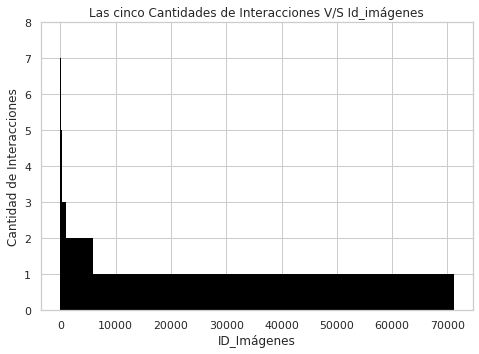

In [ ]:
# %%
# Gráficos usando figuras
import numpy as np
import matplotlib.pyplot as plt

# La figura crea un espacio donde dibujar el gráfico
fig = plt.figure()

# Necesitamos definir una relación de tamaños para el rectángulo del dibujo (l,b,w,h)
# Nota: En jupyter l(eft) y b(ottom) para el primer gráfico no se tienen en cuenta
rect = (0, 0, 1, 1)

# Añadimos los límites para crear un objeto de ejes sobre el que dibujar el gráfico
axes = fig.add_axes(rect)


valorX = valor_Item
valorY = valor_id2

xx = range(len(valorX))
plt.bar(xx, valorY, width=0.5, align='center', edgecolor='black')


# La mayor diferencia ahora es a la hora de personalizar el gráfico, teniéndonos
# que referir a los métodos con la palabra set precediendo del nombre clásico
axes.set_ylim(0, 8)
axes.set_xlabel("ID_Imágenes")
axes.set_ylabel("Cantidad de Interacciones")
axes.set_title("Las cinco Cantidades de Interacciones V/S Id_imágenes")

# Finalmente mostramos la figura
fig.show()

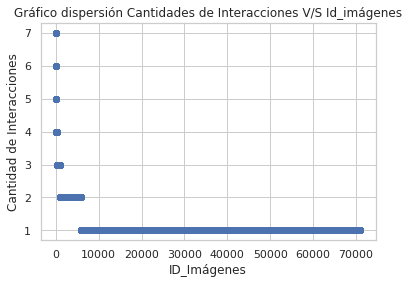

In [ ]:
# Se obtienen los valores de los ejes X e Y respectivamente



#valorX = valor_Item
valorX =np.arange(len(valor_Item))
valorY = valor_id2
"""
for i in range(len(cuenta1)):
      y1.insert(i,cuenta1[i])
      x2.insert(i,i)

xx = range(len(x2))
plt.bar(xx, y1, width=0.01, align='center', edgecolor='blue')
ax.set_xticklabels(x2)
"""


plt.scatter(valorX,valorY)
plt.xlabel("ID_Imágenes")
plt.ylabel("Cantidad de Interacciones")
plt.title('Gráfico dispersión Cantidades de Interacciones V/S Id_imágenes')

plt.show()

**Gráficos de imágenes por usuarios**

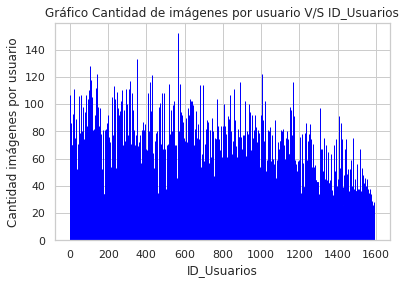

In [ ]:
# Se obtienen los valores de los ejes X e Y respectivamente
x2=[]
y1=[]

for i in range(len(cuenta1)):
      y1.insert(i,cuenta1[i])
      x2.insert(i,i)

xx = range(len(x2))
plt.bar(xx, y1, width=0.01, align='center', edgecolor='blue')
#ax.set_xticklabels(x2)

plt.xlabel('ID_Usuarios')
plt.ylabel('Cantidad imágenes por usuario')
plt.title('Gráfico Cantidad de imágenes por usuario V/S ID_Usuarios')

plt.show()


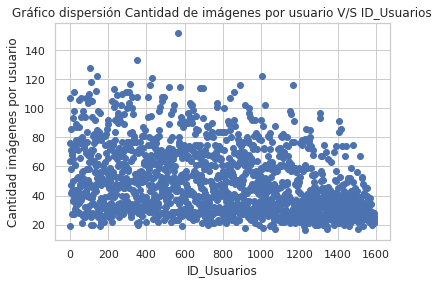

In [ ]:
# Se obtienen los valores de los ejes X e Y respectivamente
x2=[]
y1=[]

for i in range(len(cuenta1)):
      y1.insert(i,cuenta1[i])
      x2.insert(i,i)
"""
xx = range(len(x2))
plt.bar(xx, y1, width=0.01, align='center', edgecolor='blue')
ax.set_xticklabels(x2)
"""
plt.scatter(x2,y1)
plt.xlabel('ID_Usuarios')
plt.ylabel('Cantidad imágenes por usuario')
plt.title('Gráfico dispersión Cantidad de imágenes por usuario V/S ID_Usuarios')

plt.show()

## **Gráfico de los usuarios más visitados** 

**Gráficos de cantidad de Interacciones**

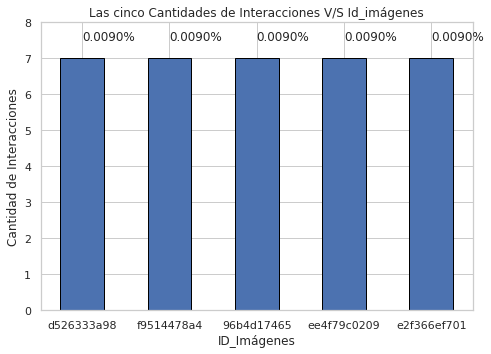

In [ ]:
# %%
# Gráficos usando figuras
import numpy as np
import matplotlib.pyplot as plt

# La figura crea un espacio donde dibujar el gráfico
fig = plt.figure()

# Necesitamos definir una relación de tamaños para el rectángulo del dibujo (l,b,w,h)
# Nota: En jupyter l(eft) y b(ottom) para el primer gráfico no se tienen en cuenta
rect = (0, 0, 1, 1)

# Añadimos los límites para crear un objeto de ejes sobre el que dibujar el gráfico
axes = fig.add_axes(rect)

# A partir de este objeto podremos crear nuestro gráfico como si fuera el clásico plt
valorX=[]
valorY=[]

imagenes5=cuenta2.most_common(5)

for i in range(5):
    valorY.insert(i,imagenes5[i][1])
    valorX.insert(i,i)

xx = range(len(valorX))
plt.bar(xx, valorY, width=0.5, align='center', edgecolor='black')

#plot(np.random.randint(100, size=[6]), label="Pedro", color="green")
#axes.plot(np.random.randint(100, size=[6]), label="Marta", color="red")
#axes.plot(np.random.randint(100, size=[6]), label="Ana", color="cyan")

# La mayor diferencia ahora es a la hora de personalizar el gráfico, teniéndonos
# que referir a los métodos con la palabra set precediendo del nombre clásico
axes.set_ylim(0, 8)
axes.set_xlabel("ID_Imágenes")
axes.set_ylabel("Cantidad de Interacciones")
axes.set_title("Las cinco Cantidades de Interacciones V/S Id_imágenes")

# La parte de mapear los nombres cambia un poco y requiere usar dos métodos
ID_I = ['d526333a98', 'f9514478a4', '96b4d17465', 'ee4f79c0209', 'e2f366ef701']
mapeado = range(len(ID_I))
axes.set_xticks(mapeado)
axes.set_xticklabels(ID_I)

axes.text(0,7.5,"0.0090%")
axes.text(1,7.5,"0.0090%")
axes.text(2,7.5,"0.0090%")
axes.text(3,7.5,"0.0090%")
axes.text(4,7.5,"0.0090%")
# Finalmente mostramos la figura
fig.show()

**Gráficos de imagenes por usuarios**

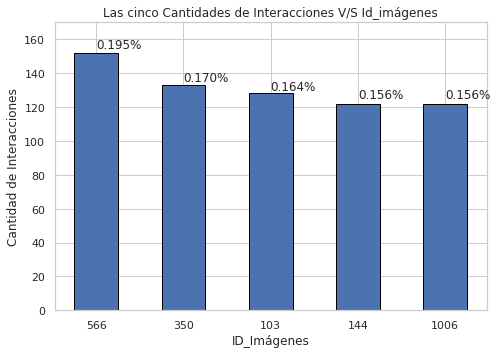

In [ ]:
# %%
# Gráficos usando figuras
import numpy as np
import matplotlib.pyplot as plt

# La figura crea un espacio donde dibujar el gráfico
fig = plt.figure()

# Necesitamos definir una relación de tamaños para el rectángulo del dibujo (l,b,w,h)
# Nota: En jupyter l(eft) y b(ottom) para el primer gráfico no se tienen en cuenta
rect = (0, 0, 1, 1)

# Añadimos los límites para crear un objeto de ejes sobre el que dibujar el gráfico
axes = fig.add_axes(rect)

# A partir de este objeto podremos crear nuestro gráfico como si fuera el clásico plt
valorX1=[]
valorY1=[]

imagenes01=cuenta1.most_common(5)

for i in range(5):
    valorY1.insert(i,imagenes01[i][1])
    valorX1.insert(i,imagenes01[i][0])

xx = range(len(valorX1))
plt.bar(xx, valorY1, width=0.5, align='center', edgecolor='black')


# La mayor diferencia ahora es a la hora de personalizar el gráfico, teniéndonos
# que referir a los métodos con la palabra set precediendo del nombre clásico
axes.set_ylim(0, 170)
axes.set_xlabel("ID_Imágenes")
axes.set_ylabel("Cantidad de Interacciones")
axes.set_title("Las cinco Cantidades de Interacciones V/S Id_imágenes")

# La parte de mapear los nombres cambia un poco y requiere usar dos métodos
ID_I = ['566', '350', '103', '144', '1006']
mapeado = range(len(ID_I))
axes.set_xticks(mapeado)
axes.set_xticklabels(ID_I)

axes.text(0,155,"0.195%")
axes.text(1,135,"0.170%")
axes.text(2,130,"0.164%")
axes.text(3,125,"0.156%")
axes.text(4,125,"0.156%")
# Finalmente mostramos la figura
fig.show()